# The Azerbaijani Laundromat - AML Analysis  
#### Author: Renzhu Li

## Step1: Clean the dataset

- Converted column "amount_eur" from object to float
- Converted column "date" from object to datetime

In [31]:
#read the dataset from json format 
import pandas as pd
aa = pd.read_csv(r'C:\Users\renzhu\Desktop\Capstone\dkdata_cleaned__.csv')
aa.head()

,Unnamed: 0,amount_eur,amount_orig,amount_orig_currency,amount_usd,beneficiary_account,beneficiary_bank_country,beneficiary_core,beneficiary_jurisdiction,beneficiary_name,...,investigation,payer_account,payer_bank_country,payer_core,payer_jurisdiction,payer_name,payer_name_norm,payer_type,purpose,source_file
0,0,431762.31,535470.00,USD,535470.0,EE27 3300 3335 0561 0002,EE,True,GB,LCM ALLIANCE LLP,...,AZ,33817018409333311204,33,False,AZ,AZARBAYCAN METANOL KOMPANI MMC,AZARBAYCAN METANOL KOMPANI MMC,Company,1206295100052180 OCT4121800021 ADVANCE PAYM FO...,pdf/LCM ALLIANCE Account statement 30.06.12-31...
1,1,423688.44,535000.00,USD,535000.0,333504500003,33,False,GB,MOBILA LLP,...,AZ,EE27 3300 3335 0561 0002,EE,True,GB,LCM ALLIANCE LLP,LCM ALLIANCE LLP,Company,1207035026699176 INVOICE.No 6215 DD 25.05.2012,pdf/LCM ALLIANCE Account statement 30.06.12-31...
2,2,71698.53,90535.19,USD,90536.0,EE77 3300 3334 8704 0004,EE,True,GB,METASTAR INVEST LLP,...,AZ,20100374548222,20,False,GB,SKN ELECTRICAL SERVICES LIMITEDACCO,SKN ELECTRICAL SERVICES LIMITED,Company,"1207065103089249 /FEE/USD4,81",pdf/METASTAR Account statement 30.06.12-31.12....
3,3,71686.50,90520.00,USD,90520.0,333455870002,33,False,VG,INMAXO CAPITAL CORP,...,AZ,EE77 3300 3334 8704 0004,EE,True,GB,METASTAR INVEST LLP,METASTAR INVEST LLP,Company,1207095022358525 DOGOVOR ZAYMA,pdf/METASTAR Account statement 30.06.12-31.12....
4,4,47.52,60.00,USD,60.0,333455870002,33,False,VG,INMAXO CAPITAL CORP,...,AZ,EE77 3300 3334 8704 0004,EE,True,GB,METASTAR INVEST LLP,METASTAR INVEST LLP,Company,1207135024578077 DOGOVOR ZAYMA,pdf/METASTAR Account statement 30.06.12-31.12....


In [32]:
#checked all of columns 
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16940 entries, 0 to 16939
Data columns (total 24 columns):
Unnamed: 0                  16940 non-null int64
amount_eur                  16940 non-null float64
amount_orig                 16940 non-null float64
amount_orig_currency        16940 non-null object
amount_usd                  16940 non-null float64
beneficiary_account         16936 non-null object
beneficiary_bank_country    16936 non-null object
beneficiary_core            16940 non-null bool
beneficiary_jurisdiction    16287 non-null object
beneficiary_name            16940 non-null object
beneficiary_name_norm       16940 non-null object
beneficiary_type            16930 non-null object
date                        16940 non-null object
id                          16940 non-null int64
investigation               16940 non-null object
payer_account               16825 non-null object
payer_bank_country          16825 non-null object
payer_core                  16940 non-null

In [33]:
#converted date from object format into DateTime
aa.date = pd.to_datetime(aa.date)

In [34]:
#re-checked to see if the column 'date' has converted successfully
aa['date'].head()

0   2012-06-30
1   2012-07-03
2   2012-07-06
3   2012-07-09
4   2012-07-13
Name: date, dtype: datetime64[ns]

In [35]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16940 entries, 0 to 16939
Data columns (total 24 columns):
Unnamed: 0                  16940 non-null int64
amount_eur                  16940 non-null float64
amount_orig                 16940 non-null float64
amount_orig_currency        16940 non-null object
amount_usd                  16940 non-null float64
beneficiary_account         16936 non-null object
beneficiary_bank_country    16936 non-null object
beneficiary_core            16940 non-null bool
beneficiary_jurisdiction    16287 non-null object
beneficiary_name            16940 non-null object
beneficiary_name_norm       16940 non-null object
beneficiary_type            16930 non-null object
date                        16940 non-null datetime64[ns]
id                          16940 non-null int64
investigation               16940 non-null object
payer_account               16825 non-null object
payer_bank_country          16825 non-null object
payer_core                  16940 

In [36]:
# check to see if any null values existed 
aa.isnull().sum()

Unnamed: 0                    0
amount_eur                    0
amount_orig                   0
amount_orig_currency          0
amount_usd                    0
beneficiary_account           4
beneficiary_bank_country      4
beneficiary_core              0
beneficiary_jurisdiction    653
beneficiary_name              0
beneficiary_name_norm         0
beneficiary_type             10
date                          0
id                            0
investigation                 0
payer_account               115
payer_bank_country          115
payer_core                    0
payer_jurisdiction          205
payer_name                    0
payer_name_norm               0
payer_type                   51
purpose                       0
source_file                   0
dtype: int64

# Step 2: Exploratory Data Analysis
 
 - Obtained top 4 payer_name based on number of transactions
 - Based on top 4 payer_name, extract Top 4 payer_country and beneficiary country based on number of transactions
 - Based on top 4 payer_name, detect top 4 beneficiary_name

In [108]:
#group by payer name to see who are the top 4 payer_name based on the metric "Number of Transactions"
top4_payer_name = aa.groupby(['payer_name_norm']).size().to_frame('Number of Transactions')
top4_payer_name.sort_values(by='Number of Transactions',ascending=False,inplace=True)
top4_payer_name[:4]

,Number of Transactions
payer_name_norm,
HILUX SERVICES LP,5178
METASTAR INVEST LLP,3846
LCM ALLIANCE LLP,2820
POLUX MANAGEMENT LP,1344


In [112]:
#created a subset to extract these four companie's data from the original dataset 
top4_payer = aa[(aa['payer_name_norm']=='HILUX SERVICES LP') | (aa['payer_name_norm']=='LCM ALLIANCE LLP') | (aa['payer_name_norm']=='METASTAR INVEST LLP') | (aa['payer_name_norm']=='POLUX MANAGEMENT LP')]

In [113]:
#group by payer_name and country to see where are these top 4 payer's location (country)
top4_payer_country = top4_payer.groupby(['payer_name_norm','payer_bank_country']).size().to_frame('Number of Transactions')
top4_payer_country

Number of Transactions
payer_name_norm     payer_bank_country                        
HILUX SERVICES LP   33                                     122
                    EE                                    5056
LCM ALLIANCE LLP    33                                      35
                    EE                                    2785
METASTAR INVEST LLP 33                                      49
                    EE                                    3736
                    LV                                      61
POLUX MANAGEMENT LP 33                                      50
                    EE                                    1294

In [114]:
top4_payer_country_max = top4_payer_country[(top4_payer_country['Number of Transactions']== 5056)|(top4_payer_country['Number of Transactions']== 2785)|(top4_payer_country['Number of Transactions']== 3736)|(top4_payer_country['Number of Transactions']== 1294)]
top4_payer_country_max

,,Number of Transactions
payer_name_norm,payer_bank_country,
HILUX SERVICES LP,EE,5056
LCM ALLIANCE LLP,EE,2785
METASTAR INVEST LLP,EE,3736
POLUX MANAGEMENT LP,EE,1294


### Top 4 Payer Location - Country: 
#### Red Flag1: All of payers located at Estonia 

In [115]:
#reset the index 
top4_payer_country_max11 = top4_payer_country_max.reset_index()
top4_payer_country_max11

,payer_name_norm,payer_bank_country,Number of Transactions
0,HILUX SERVICES LP,EE,5056
1,LCM ALLIANCE LLP,EE,2785
2,METASTAR INVEST LLP,EE,3736
3,POLUX MANAGEMENT LP,EE,1294


In [116]:
top4_payer_country_max11.sort_values(by='Number of Transactions',ascending=False,inplace=True)
top4_payer_country_max11

,payer_name_norm,payer_bank_country,Number of Transactions
0,HILUX SERVICES LP,EE,5056
2,METASTAR INVEST LLP,EE,3736
1,LCM ALLIANCE LLP,EE,2785
3,POLUX MANAGEMENT LP,EE,1294


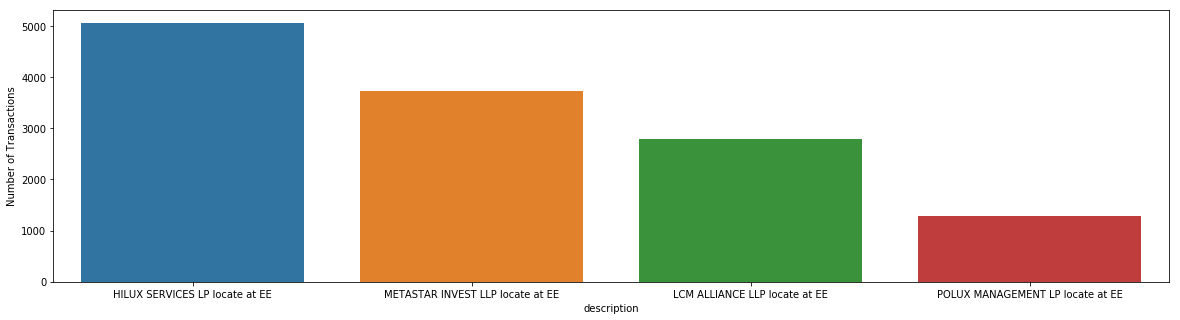

In [118]:
#plot the top 4 payers in one bar chart to see where they are located by number of transactions made in that country 
import matplotlib.pyplot as plt
import seaborn as sns
top4_payer_country_max11['description'] = top4_payer_country_max11.payer_name_norm + ' locate at ' + top4_payer_country_max11.payer_bank_country
plt.figure(figsize=(20,5))
sns.barplot(x='description',y='Number of Transactions',data=top4_payer_country_max11);
plt.xticks(rotation=360)
plt.show();

In [124]:
#trace the top 4 payer's name to see who are the top 4 beneficiaries based on the number of transactions 
top4_beneficiary_name = top4_payer.groupby(['payer_name_norm','beneficiary_name_norm']).size().to_frame('Number of Transactions')
payer_beneficiary_max = top4_beneficiary_name.groupby(['payer_name_norm']).apply(max) #extracted the top 4 payers in each group
payer_beneficiary_max

,Number of Transactions
payer_name_norm,
HILUX SERVICES LP,321
LCM ALLIANCE LLP,205
METASTAR INVEST LLP,126
POLUX MANAGEMENT LP,100


In [143]:
top4_beneficiary = top4_beneficiary_name[(top4_beneficiary_name['Number of Transactions']== 321)|(top4_beneficiary_name['Number of Transactions']== 205)|(top4_beneficiary_name['Number of Transactions']== 126)|(top4_beneficiary_name['Number of Transactions']== 100)]
top4_beneficiary = top4_beneficiary.reset_index()
top4_beneficiary

,payer_name_norm,beneficiary_name_norm,Number of Transactions
0,HILUX SERVICES LP,FABERLEX LP,321
1,LCM ALLIANCE LLP,KG COMMERCE LLP,205
2,METASTAR INVEST LLP,LOTA SALES LLP,126
3,POLUX MANAGEMENT LP,RIVERLANE LLP,100


### Top 4 Beneficiaries 
#### Red flag2: one of top 4 payers "HILUX SERVICES LP" had 321 transactions with "FABERLEX LP" 

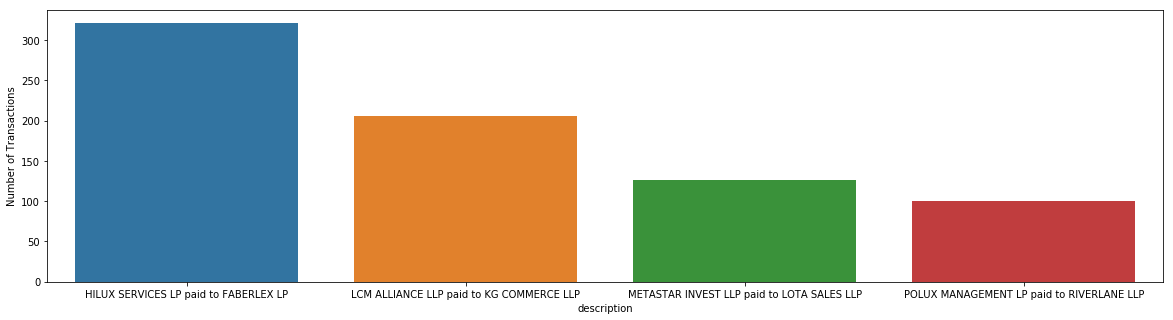

In [144]:
#plot each payers into one bar chart to see who they paid to by number of transactions made for each beneficiary 
top4_beneficiary['description'] = top4_beneficiary.payer_name_norm + ' paid to ' + top4_beneficiary.beneficiary_name_norm
plt.figure(figsize=(20,5))
sns.barplot(x='description',y='Number of Transactions',data=top4_beneficiary);
plt.xticks(rotation=360)
plt.show();

# Step 3: Historical Analysis & Visualization<br> 

- Based on top 4 payers on step 1, get more details about each payer's date and number of transactions 
- Created historical line chart between 2012 to 2014 for top 4 payers based on number of transactions to observe time series activities 
- Created bar charts between 2012 to 2014 for top 4 payers based on average amount per transactions


#### Data preparation for the purpose: generate historical data visualization for top 4 payers 

In [146]:
# to see if there are transactions that happen on the same date - group by payer name and date
company_group_date = aa.groupby(['payer_name_norm','date'],as_index=False).size().to_frame('Number of Transactions')
company_group_date.sort_values(by='Number of Transactions',ascending=False,inplace=True)

# To get the total amount under each date - group by payer_name and date
company_groupby_amount = aa.groupby(['payer_name_norm','date']).sum()['amount_eur'].to_frame('Amount')
company_groupby_amount.sort_values(by='Amount',ascending=False,inplace=True)

# consolidated two dataframes above by inner join on 'payer_name' and 'date'
payer_date_df = pd.merge(company_group_date,company_groupby_amount,how='inner',on=['payer_name_norm','date'])

# created index for dataframe 'payer_date_df'
payer_date_df = payer_date_df.reset_index()

# filterd top 4 payer_name by based on payer_name and date
top4_company = payer_date_df[(payer_date_df['payer_name_norm']=='HILUX SERVICES LP') | (payer_date_df['payer_name_norm']=='LCM ALLIANCE LLP') | (payer_date_df['payer_name_norm']=='METASTAR INVEST LLP') | (payer_date_df['payer_name_norm']=='POLUX MANAGEMENT LP')]
top4_company.head()

# created index for dataframe 'top4_company' to re-order the index for date coding purpose
top4_company = top4_company.reset_index()

# added another column to calculate average amount per transaction
top4_company['Ave Amount Per Transaction'] = top4_company['Amount']/top4_company['Number of Transactions']

# renamed the top 4 companies
top4_company.rename(columns={'Number of Transactions':'Num_Trans', 'Ave Amount Per Transaction':'Ave_Amt_Trans'},inplace=True)

# converted datetime to string
top4_company['date'] = top4_company['date'].astype(str)

In [147]:
top4_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 6 columns):
index              1062 non-null int64
payer_name_norm    1062 non-null object
date               1062 non-null object
Num_Trans          1062 non-null int64
Amount             1062 non-null float64
Ave_Amt_Trans      1062 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 49.9+ KB


In [149]:
# this code extracts month and year for each transaction - this will be used for data visualization
from datetime import date

transaction_list = []
for d, row in enumerate(top4_company.values):
    getYear, getMonth, getDay = top4_company.date[d].split('-')
    month = getMonth #extracts and stores month information
    year = getYear #extracts and stores year information
    t_list = [top4_company.payer_name_norm[d], month, year,top4_company.date[d],top4_company.Num_Trans[d],top4_company.Amount[d],top4_company.Ave_Amt_Trans[d]]
    transaction_list.append(t_list)
transactions = pd.DataFrame(transaction_list, columns = ['Company', 'Month', 'Year','Year_Month_Date', 'Number of Transactions','Amount','Average Amount Per Transaction'])


In [151]:
#group by each company by year and month to clearly see the number of transactions under each year in different month
trans_mon_yr = transactions.groupby(['Company','Year','Month'])['Number of Transactions','Amount'].sum()
#add another column "Average Amount Per Transaction" calculated by amount/number of transactions
trans_mon_yr['Average Amount Per Transaction'] = trans_mon_yr['Amount']/trans_mon_yr['Number of Transactions']
#create another subset to contain "company",'year','month' and 'Number of Transactions'
transaction_df = transactions.loc[:,['Company','Year','Month','Number of Transactions']]
#concatenate columns 'month' and 'year' into a new column named 'Month_Year' for purpose of making line chart 
transaction_df['Month_Year'] = transaction_df['Month'] + '-' + transaction_df['Year']
#droped the columns 'year' and 'month'
transaction_df.drop(columns=['Year','Month'],inplace=True)
#converted it into pandas dataframe
transaction_df.Month_Year = pd.to_datetime(transaction_df.Month_Year)

### The number of transactions movement for top 4 payers between 2012 to 2014

C:\Users\renzhu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


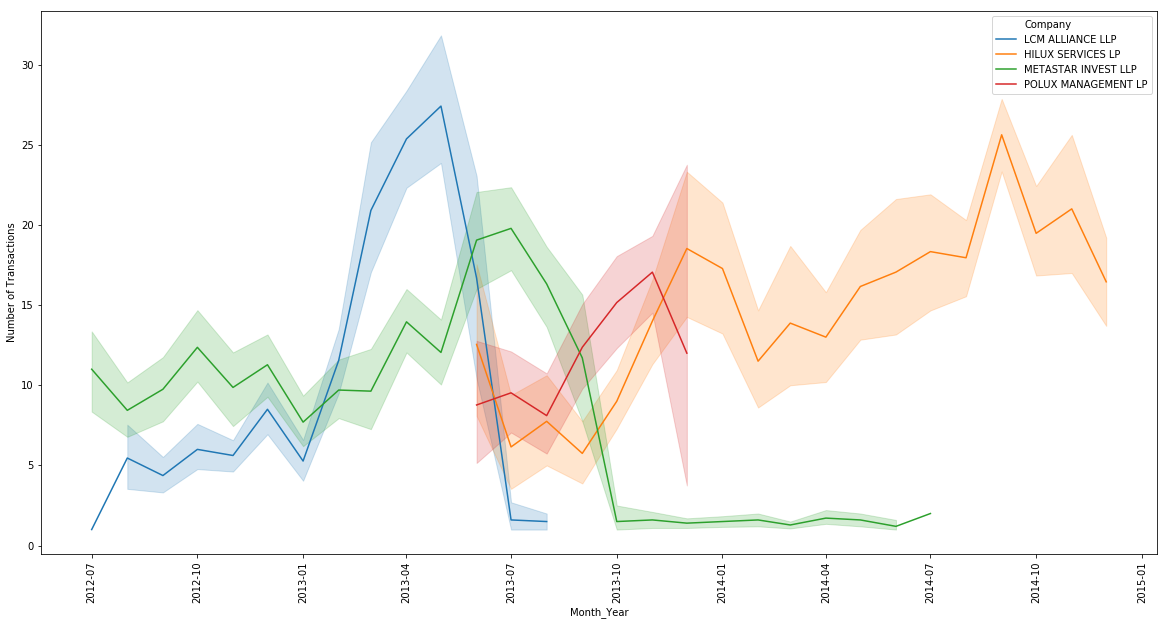

In [152]:
#plot top four payers in one line chart based on number of transactions from 2012 to 2014 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.lineplot(x='Month_Year',y='Number of Transactions',hue='Company',data=transaction_df);

In [163]:
ben_cnt = top4_payer.groupby(['payer_name_norm','beneficiary_name_norm']).size()
ben_cnt.head()

payer_name_norm    beneficiary_name_norm             
HILUX SERVICES LP  3B SCIENTIFIC EUROPE KFT              1
                   3M EAST AG                            2
                   3S MADENCILIK SERAMIK INSAAT          7
                   A2 DI DAVIDE AGRATI + C. SNC          1
                   ACIKGOZ IPLIK VE HALI SAN.TIC.LTD.    1
dtype: int64

In [157]:
ben_cnt.to_csv(r'C:\Users\renzhu\Desktop\Capstone\aadd.csv')

### Insight:
#### The number of transactions for "LCM" and "METASTAR" started to grow strong at the beginning of 2013 then decreased dramatically at the end of 2013. On the other hand, the number of transactions for "HILUX" and "POLUX" started to grow strong at the opposite time period (at the end of 2013) of "LCM" and "METASTAR". So, I believe they have a "smart" money laundering strategy by switching around the firms to disguise the detection.  